In [1]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt

In [2]:
gpus = tf.config.list_physical_devices('GPU')

(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [3]:
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Flatten the 28x28 images into 1D vectors
    Dense(128, activation='relu'),  # Fully connected layer with 128 neurons
    Dense(10, activation='softmax') # Output layer with 10 classes
])


model.summary()


model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, Y_train, epochs=50, 
                    shuffle=True,
                    validation_split=0.4, 
                    batch_size=2048)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
18/18 [==============================] - 2s 22ms/step - loss: 1.3108 - accuracy: 0.5738 - val_loss: 0.7885 - val_accuracy: 0.7209
Epoch 2/50
18/18 [==============================] - 0s 11ms/step - loss: 0.6988 - accuracy: 0.7621 - val_loss: 0.6222 - val_accuracy: 0.7918
Epoch 3/50
18/18 [==============

In [4]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3684 - accuracy: 0.8695


[0.3683992922306061, 0.8694999814033508]

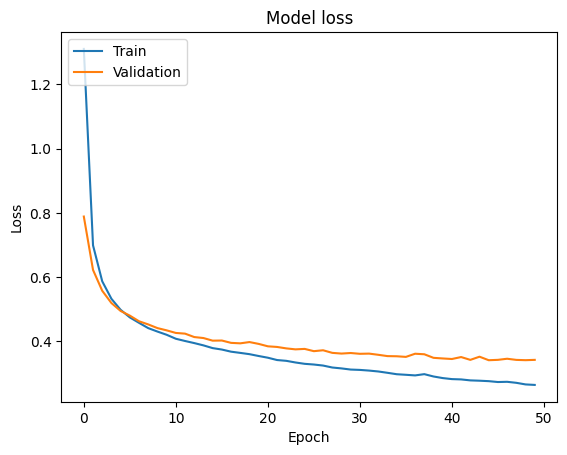

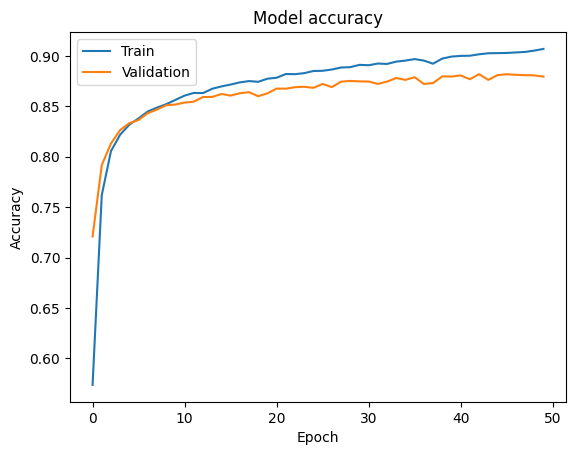

In [5]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()